# **Fake News Detection**

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import re
import string

## Upload Dataset



In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load datasets into dataframes
df_fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ADML Assignment/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ADML Assignment/True.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Initial Data Analysis

In [ ]:
# Add 'class' column: 0 for Fake News, 1 for True News
df_fake["class"] = 0
df_true["class"] = 1

# Check dataset shapes
print(f"Fake News Shape: {df_fake.shape}, True News Shape: {df_true.shape}")

Fake News Shape: (23481, 5), True News Shape: (21417, 5)


## Prepare Testing Data

In [ ]:
# Extract last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
df_true_manual_testing = df_true.tail(10)

# Drop these rows from the original datasets
df_fake = df_fake.iloc[:-10]
df_true = df_true.iloc[:-10]

# Assign 'class' for manual testing datasets
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

# Combine manual testing data
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv", index=False)

# Confirm shape after modification
print(f"Modified Fake News Shape: {df_fake.shape}, True News Shape: {df_true.shape}")


Modified Fake News Shape: (23471, 5), True News Shape: (21407, 5)


<ipython-input-6-a806f5ac996b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-6-a806f5ac996b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


## Merge and Shuffle Data

In [ ]:
# Merge the datasets
df_merge = pd.concat([df_fake, df_true], axis=0)

# Drop unnecessary columns
df = df_merge.drop(["title", "subject", "date"], axis=1)

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())


                                                text  class
0  Beyonce Knowles took the field at Super Bowl 5...      0
1  While US citizens are outraged over the remova...      0
2  CARACAS (Reuters) - President Nicolas Maduro d...      1
3  Three men in Uppsala have been arrested on sus...      0
4  You d think that in the year 2016, companies w...      0


## Preprocess Text Data

In [ ]:
# Define a function to clean text
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Apply the function to the text column
df["text"] = df["text"].apply(wordopt)


## Split Data

In [ ]:
# Define dependent and independent variables
x = df["text"]
y = df["class"]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Convert text data to vectors
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


## Train Models

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(xv_train, y_train)
print(f"Logistic Regression Accuracy: {LR.score(xv_test, y_test)}")

# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
print(f"Decision Tree Accuracy: {DT.score(xv_test, y_test)}")

# Gradient Boosting Classifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
print(f"Gradient Boosting Classifier Accuracy: {GBC.score(xv_test, y_test)}")

# Random Forest
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
print(f"Random Forest Accuracy: {RFC.score(xv_test, y_test)}")


Logistic Regression Accuracy: 0.9854723707664884
Decision Tree Accuracy: 0.9952762923351158
Gradient Boosting Classifier Accuracy: 0.9953654188948307
Random Forest Accuracy: 0.9905525846702318


## Model Testing Function

In [ ]:
# Helper function to get label
def output_label(n):
    return "Fake News" if n == 0 else "Not A Fake News"

# Function for manual testing
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print(f"\nLR Prediction: {output_label(pred_LR[0])} \nDT Prediction: {output_label(pred_DT[0])} "
                 f"\nGBC Prediction: {output_label(pred_GBC[0])} \nRFC Prediction: {output_label(pred_RFC[0])}")


## Test with Custom Input

In [ ]:
# Input a news article for testing
news = input("Enter a news article for testing: ")
manual_testing(news)


Enter a news article for testing: BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line wit

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


<ipython-input-14-553233a85f3b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


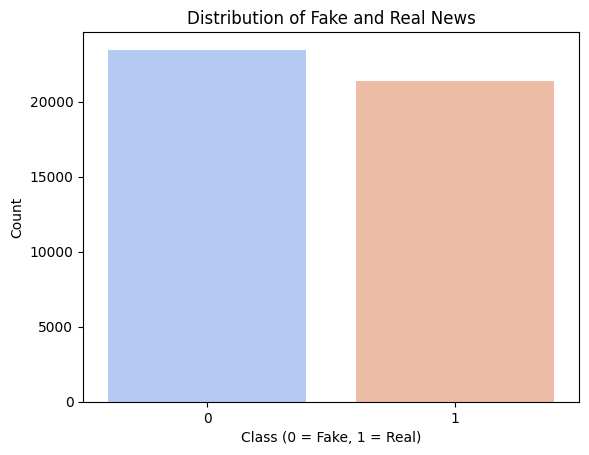

In [ ]:
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Distribution of Fake and Real News')
plt.xlabel('Class (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.show()


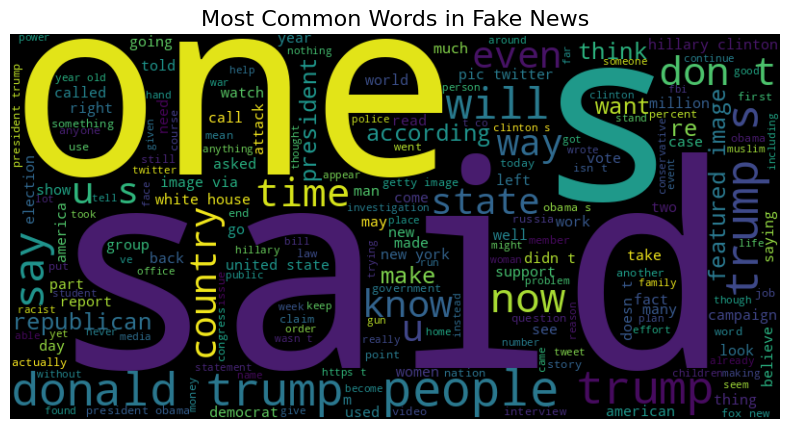

In [ ]:
fake_news = df[df['class'] == 0]['text'].str.cat(sep=' ')
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_news)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Most Common Words in Fake News', fontsize=16)
plt.axis('off')
plt.show()


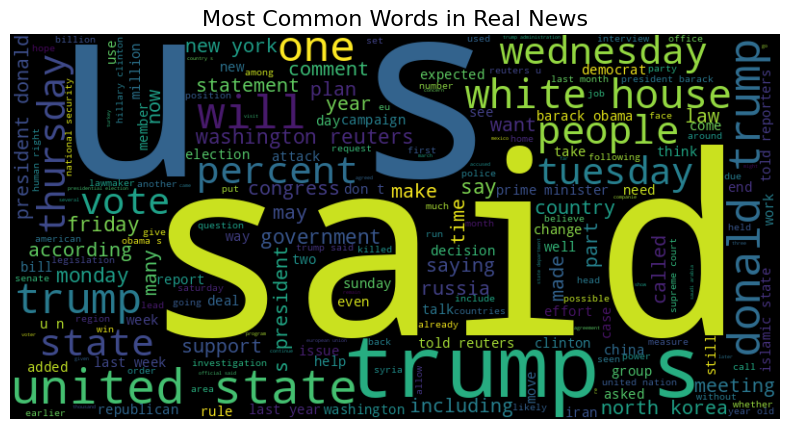

In [ ]:
real_news = df[df['class'] == 1]['text'].str.cat(sep=' ')
wordcloud_real = WordCloud(width=800, height=400, background_color='black').generate(real_news)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Most Common Words in Real News', fontsize=16)
plt.axis('off')
plt.show()


<ipython-input-19-465e327457c2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=fake_words_df, palette='Reds_r')


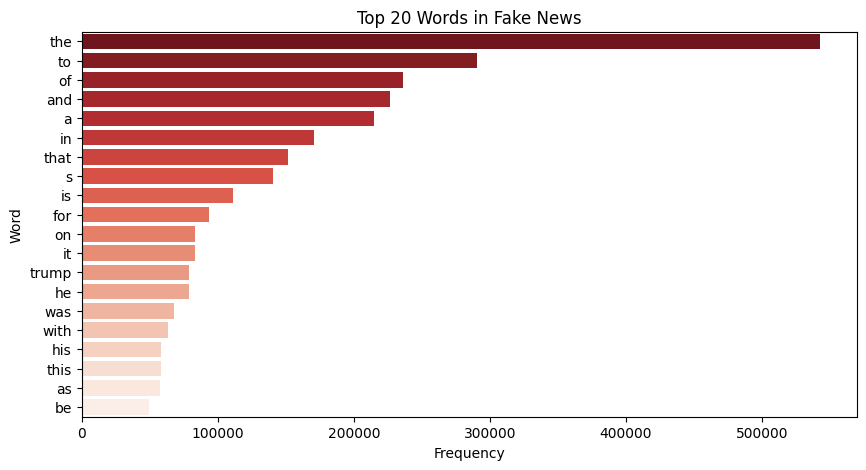

<ipython-input-19-465e327457c2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=real_words_df, palette='Blues_r')


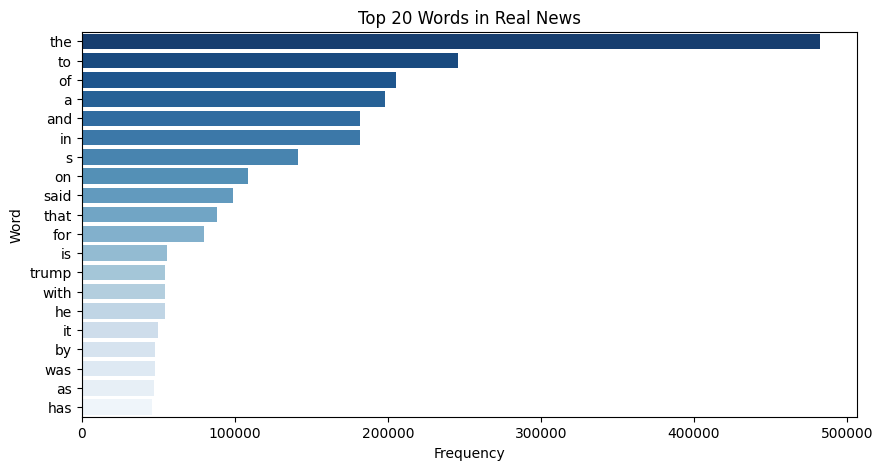

In [ ]:
# Function to get top N words
def get_top_n_words(text, n=None):
    words = ' '.join(text).split()
    return Counter(words).most_common(n)

# Get top 20 words for Fake News
fake_top_words = get_top_n_words(df[df['class'] == 0]['text'], n=20)
fake_words_df = pd.DataFrame(fake_top_words, columns=['Word', 'Frequency'])

# Get top 20 words for Real News
real_top_words = get_top_n_words(df[df['class'] == 1]['text'], n=20)
real_words_df = pd.DataFrame(real_top_words, columns=['Word', 'Frequency'])

# Plot for Fake News
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=fake_words_df, palette='Reds_r')
plt.title('Top 20 Words in Fake News')
plt.show()

# Plot for Real News
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=real_words_df, palette='Blues_r')
plt.title('Top 20 Words in Real News')
plt.show()


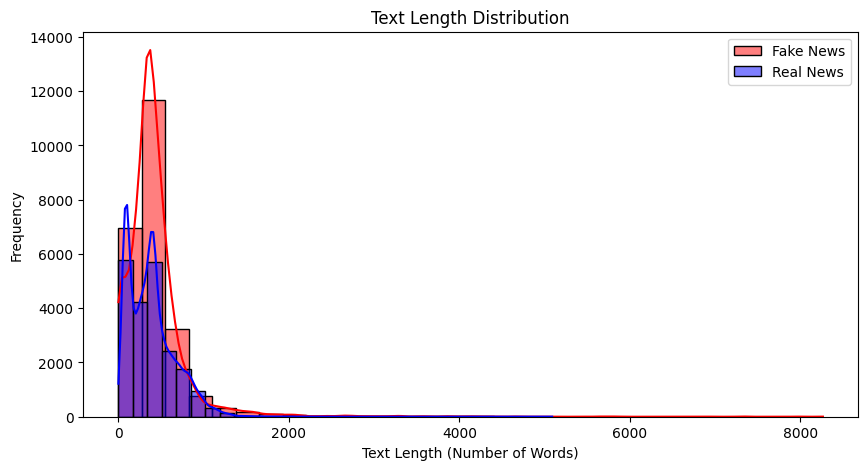

In [ ]:
# Calculate text lengths
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Plot distributions
plt.figure(figsize=(10, 5))
sns.histplot(df[df['class'] == 0]['text_length'], color='red', label='Fake News', kde=True, bins=30)
sns.histplot(df[df['class'] == 1]['text_length'], color='blue', label='Real News', kde=True, bins=30)
plt.title('Text Length Distribution')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


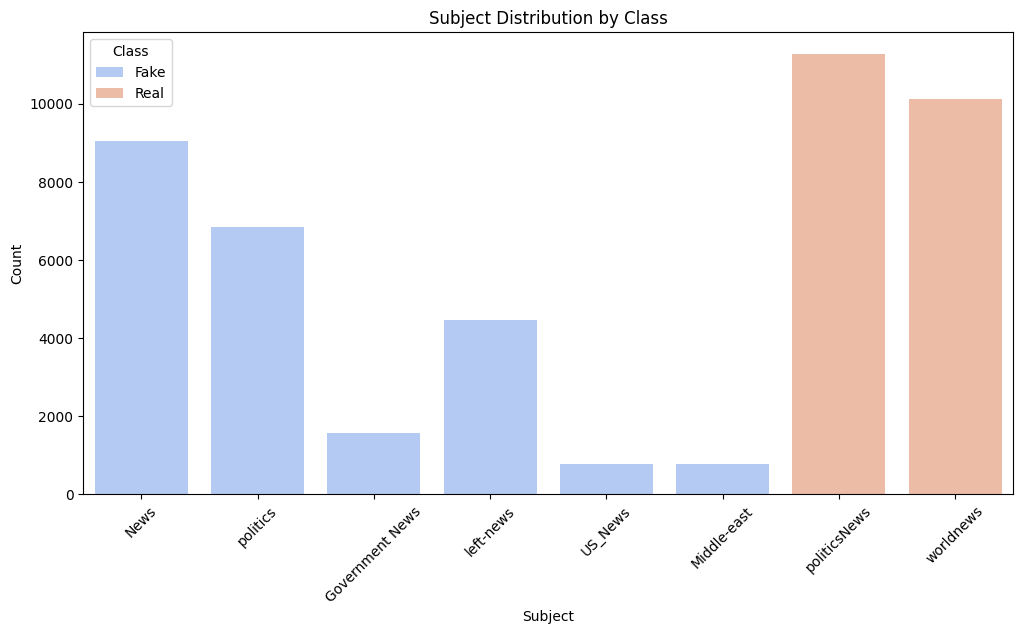

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', hue='class', data=df_merge, palette='coolwarm')
plt.title('Subject Distribution by Class')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Fake', 'Real'])
plt.show()


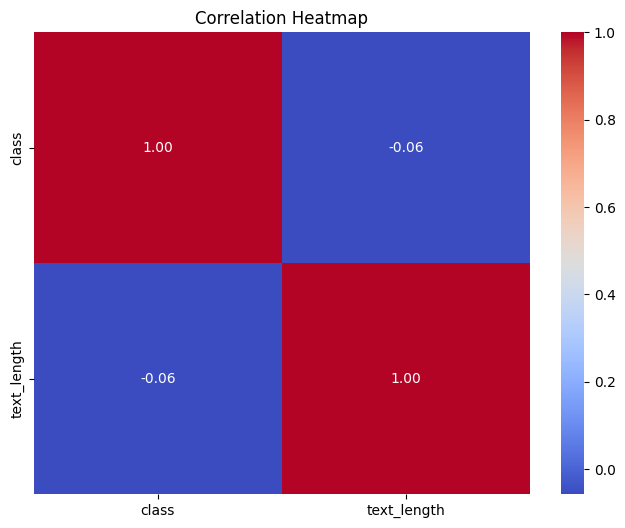

In [ ]:
# Correlation heatmap (only useful if there are numeric features other than class)
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


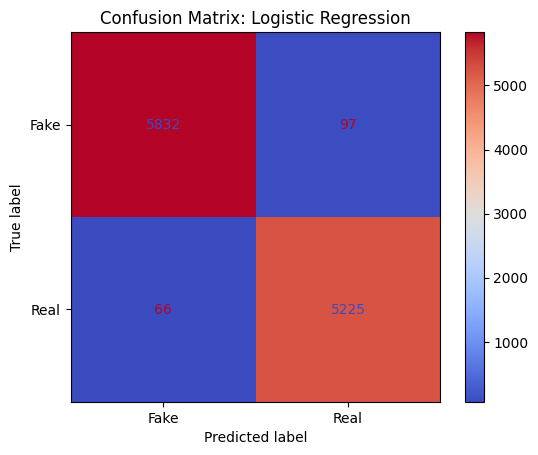

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix for Logistic Regression (can repeat for other models)
# Predict on the test set using the Logistic Regression model
pred_lr = LR.predict(xv_test)  # Assign predictions to pred_lr

cm = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='coolwarm')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()


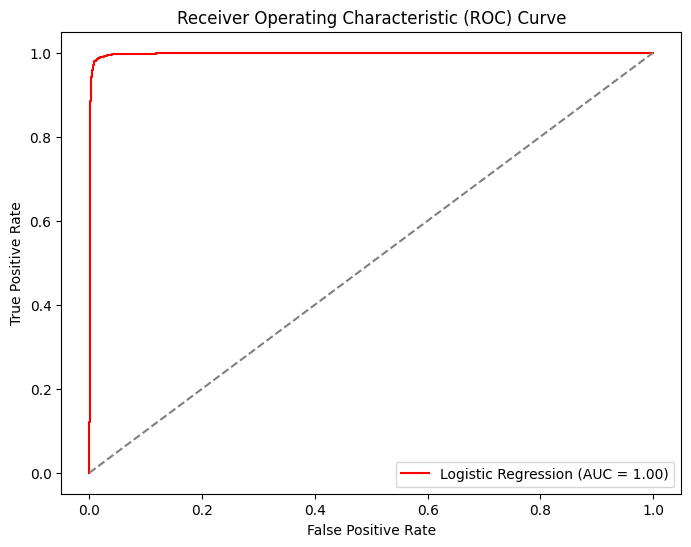

In [ ]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC
y_pred_prob_lr = LR.predict_proba(xv_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<ipython-input-27-c4bea98a2de7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


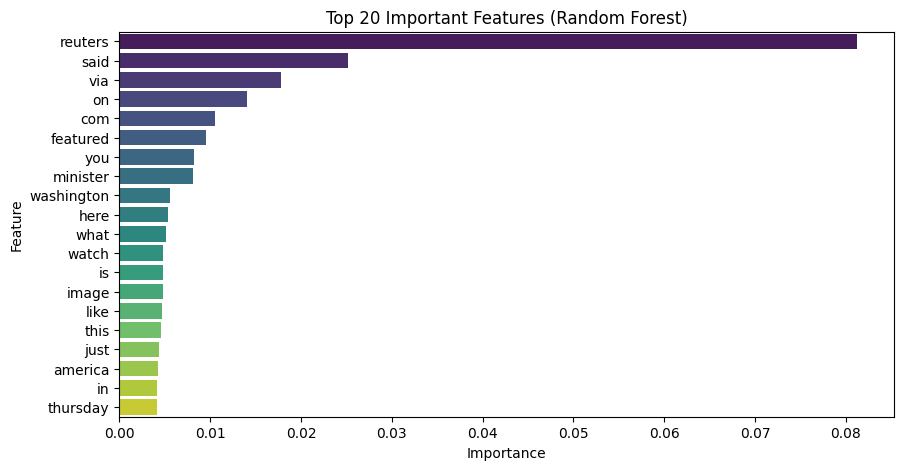

In [ ]:
# Feature importance for Random Forest
feature_importance = pd.DataFrame({'Feature': vectorization.get_feature_names_out(),
                                   'Importance': RFC.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Top 20 Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


<ipython-input-28-d0196d25180c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=metrics_df, palette='coolwarm')


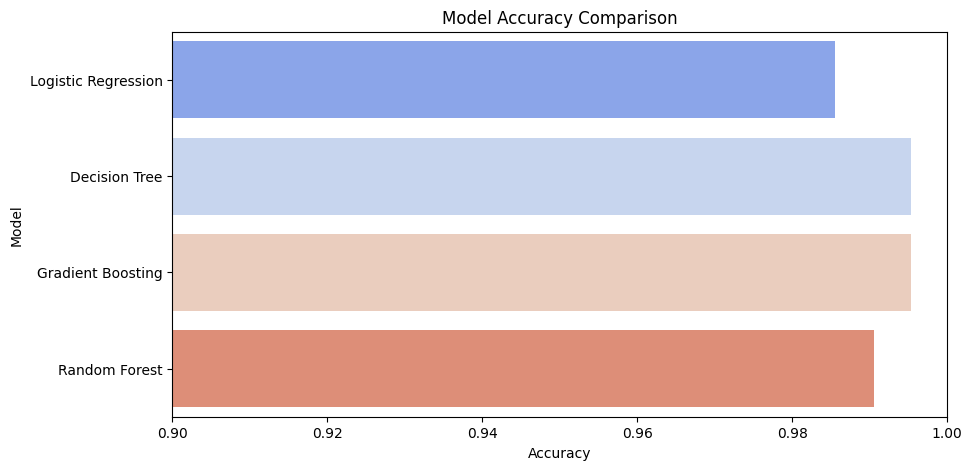

In [ ]:
# Create a DataFrame to store metrics
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [LR.score(xv_test, y_test), DT.score(xv_test, y_test), GBC.score(xv_test, y_test), RFC.score(xv_test, y_test)]
}

metrics_df = pd.DataFrame(metrics)

# Plot performance metrics
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=metrics_df, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.9, 1.0)  # Assuming high accuracy values
plt.show()


In [ ]:
# Add predictions to the test set
test_results = x_test.reset_index(drop=True).to_frame()
test_results['Actual'] = y_test.values
test_results['Predicted_LR'] = pred_lr
test_results['Correct'] = test_results['Actual'] == test_results['Predicted_LR']

# Filter misclassified examples
misclassified = test_results[test_results['Correct'] == False]
print("Sample Misclassified Texts:")
print(misclassified.head())


Sample Misclassified Texts:
                                                  text  Actual  Predicted_LR  \
20   hey bernie the first step in fighting corrupti...       0             1   
119  new york  reuters    new jersey governor chris...       1             0   
161  apparently it takes just one american student ...       0             1   
196   reuters    democrat hillary clinton and repub...       1             0   
220  another winner for america and for president t...       0             1   

     Correct  
20     False  
119    False  
161    False  
196    False  
220    False  


<ipython-input-30-5a0420d0c654>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=fake_freq, palette='Reds_r')


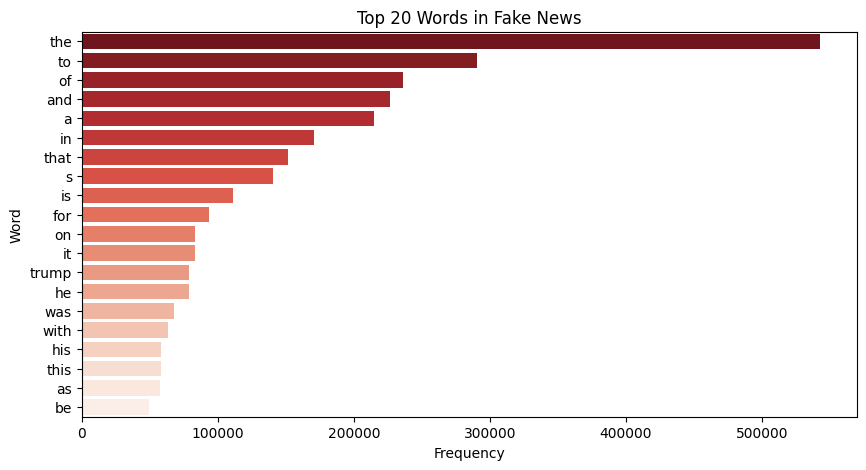

<ipython-input-30-5a0420d0c654>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=real_freq, palette='Blues_r')


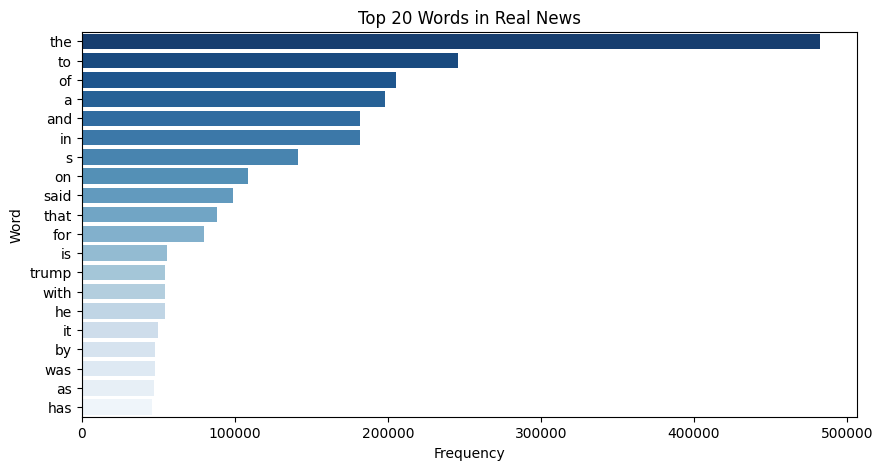

In [ ]:
# Word frequencies for fake and real news
fake_words = Counter(" ".join(df[df['class'] == 0]['text']).split()).most_common(20)
real_words = Counter(" ".join(df[df['class'] == 1]['text']).split()).most_common(20)

fake_freq = pd.DataFrame(fake_words, columns=['Word', 'Frequency'])
real_freq = pd.DataFrame(real_words, columns=['Word', 'Frequency'])

# Fake news word frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=fake_freq, palette='Reds_r')
plt.title('Top 20 Words in Fake News')
plt.show()

# Real news word frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=real_freq, palette='Blues_r')
plt.title('Top 20 Words in Real News')
plt.show()
